<a href="https://colab.research.google.com/github/alitarraf/Data-Science-Training/blob/master/A_Hayek_a_dietician_story.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear and discrete programming optimization

## Introduction 
Discrete optimization is a branch of optimization methodology which deals with discrete quantities i.e. non-continuous functions. It is quite ubiquitous in as diverse applications such as financial investment, diet planning, manufacturing processes, and player or schedule selection for professional sports.

Linear and (mixed) integer programming are techniques to solve problems which can be formulated within the framework of discrete optimization.

Knowledge of such optimization techniques is extremely useful for data scientists and machine learning (ML) practitioners as discrete and continuous optimization lie at the heart of modern ML and AI systems as well as data-driven business analytics processes.

    There are many commercial optimizer tools, but having hands-on experience with a programmatic way of doing optimization is invaluable.

There is a long and rich history of the theoretical development of robust and efficient solvers for optimization problems. However, focusing on practical applications, we will skip that history and move straight to the part of learning how to use programmatic tools to formulate and solve such optimization problems.

There are many excellent optimization packages in Python. In this article, we will specifically talk about PuLP. But before going to the Python library, let us get a sense of the kind of problem we can solve with it.


## Introduction to Linear Programming with Pulp
In this notebook we will be looking at some linear programming problems and how we can construct and solve these problems using the python linear programming package PuLP.

Let’s start with a simple example:

We want to find the maximum solution to:

\begin{equation}
Z=4x+3y
\end{equation}

This is known as our objective function. x and y in this equation are our decision variables.

In this example, the objective function is subject to the following constraints:

\begin{equation}
x≥0 \\
y≥2 \\
2y≤25–x \\
4y≥2x–8 \\
y≤2x−5 \\
\end{equation}

We will begin by visualizing the problem.

In [1]:
# Loading libraries for array computations (Numpy) and for plotting (Matplotlib)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Loading libraries
!pip install pulp
from pulp import *

In [0]:
# Construct lines
# x > 0
x = np.linspace(0, 20, 2000)
# y >= 2
y1 = (x*0) + 2
# 2y <= 25 - x
y2 = (25-x)/2.0
# 4y >= 2x - 8 
y3 = (2*x-8)/4.0
# y <= 2x - 5 
y4 = 2 * x -5

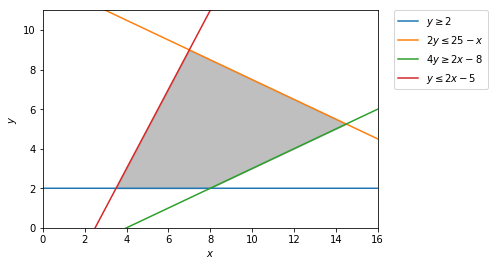

In [3]:
# Make plot
plt.plot(x, y1, label=r'$y\geq2$')
plt.plot(x, y2, label=r'$2y\leq25-x$')
plt.plot(x, y3, label=r'$4y\geq 2x - 8$')
plt.plot(x, y4, label=r'$y\leq 2x-5$')
plt.xlim((0, 16))
plt.ylim((0, 11))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# Fill feasible region
y5 = np.minimum(y2, y4)
y6 = np.maximum(y1, y3)
plt.fill_between(x, y5, y6, where=y5>y6, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Our solution lies somewhere in the grey feasible region in the graph above.

It has been proven that the minima and maxima of linear programming problems lie at the vertices of the feasible region. In this example, there are only 4 corners to our feasible region, so we can find the solutions for each corner to find our maximum.

The four corners are between the lines 1 and 2. Solving the inequalities at the intersections, yields the following x, y value and the coresponding Z value. 

\begin{array}{ccc}
Line 1& Line 2& Intersection(x,y)& Z-value \\
y>2&4y>2x-8&8,2&38\\
2y<25-x&y<2x-5&7,9&55 \\
2y<25-x&4y>2x-8&14.5,5.25&73.75 \\
y>2&y<2x-5&3.5,2&20 \\
\end{array}

We have successfully calculated that the maximum value **for Z is 73.75, when x is 14.5 and y is 5.25.**


This method of testing every vertex is only feasible for a small number of variables and constraints.
As the numbers of constraints and variables increase, it becomes far more difficult to graph these problems and work out all the vertices.
For example, if there were a third variable:
\begin{equation}
Z=Ax+By+Cz
\end{equation}

We would have to graph in three dimensions (x, y and z).

Question: ***What if the problem was not linear Z = 4x+3y but a CONVEX optimization like Z = 4x^3+y^2?***

Next, we’ll take a look at how we can use python and the PuLP package to solve this linear programming problem, as well as some more complex problems

In [0]:
#Then instantiate a problem class, we’ll name it “My LP problem” and we’re looking for an optimal maximum so we use LpMaximize

my_lp_problem = pulp.LpProblem("My LP Problem", pulp.LpMaximize)

In [0]:
#We then model our decision variables using the LpVariable class. In our example, x had a lower bound of 0 and y had a lower bound of 2.
#Upper bounds can be assigned using the upBound parameter.

x = pulp.LpVariable('x', lowBound=0, cat='Continuous')
y = pulp.LpVariable('y', lowBound=2, cat='Continuous')

In [0]:
#The objective function and constraints are added using the += operator to our model.
#The objective function is added first, then the individual constraints.

# Objective function
my_lp_problem += 4 * x + 3 * y, "Z"

# Constraints
my_lp_problem += 2 * y <= 25 - x
my_lp_problem += 4 * y >= 2 * x - 8
my_lp_problem += y <= 2 * x - 5

In [7]:
#We have now constructed our problem and can have a look at it.
my_lp_problem

My LP Problem:
MAXIMIZE
4*x + 3*y + 0
SUBJECT TO
_C1: x + 2 y <= 25

_C2: - 2 x + 4 y >= -8

_C3: - 2 x + y <= -5

VARIABLES
x Continuous
2 <= y Continuous

PuLP supports open source linear programming solvers such as CBC and GLPK, as well as commercial solvers such as Gurobi and IBM’s CPLEX.

The default solver is CBC, which comes packaged with PuLP upon installation.

For most applications, the open source CBC from COIN-OR will be enough for most simple linear programming optimisation algorithms.


In [8]:
# Let's solve the problem now.
my_lp_problem.solve()
pulp.LpStatus[my_lp_problem.status]

'Optimal'

We have also checked the status of the solver, there are 5 status codes:

1. Optimal: An optimal solution has been found.
2. Infeasible: There are no feasible solutions (e.g. if you set the constraints x <= 1 and x >=2).
3. Unbounded: The constraints are not bounded, maximising the solution will tend towards infinity (e.g. if the only constraint was x >= 3).
4. Undefined: The optimal solution may exist but may not have been found.


We can now view our maximal variable values and the maximum value of Z.

We can use the varValue method to retrieve the values of our variables x and y, and the pulp.value function to view the maximum value of the objective function.


In [9]:
for variable in my_lp_problem.variables():
    print ("{} = {}".format(variable.name, variable.varValue))

x = 14.5
y = 5.25


In [10]:
print (pulp.value(my_lp_problem.objective))

73.75


Same values as our manual calculations.
In the next part we’ll be looking at a more real world problem.

# Your turn
Your turn now to set up and solve this linear optimization problem.

We want to find the maximum solution to:

\begin{equation}
Z=x+y
\end{equation}

This is known as our objective function. x and y in this equation are our decision variables.

In this example, the objective function is subject to the following constraints:

\begin{equation}
x≥0 \\
y≥2 \\
2y≤25–x \\
4y≥2x–8 \\
y≤2x−5 \\
\end{equation}



In [0]:
# Start here, copy paste code from above


## The case of A.Hayek, a dietecian at AUBMC

Suppose Ali Hayek is in charge of the diet plan for American University of Beirut Medical Center patients lunch. His job is to make sure that the patients get the right balance of nutrition from the chosen food.

![alt text](https://cdn-images-1.medium.com/max/1600/1*klU9NCgMi8ku1KOBTC4LDg.jpeg)

However, there are some restrictions in terms of budget and the variety of food that needs to be in the diet to make it interesting. The following table shows, in detail, the complete nutritional value for each food item, and their maximum/minimum daily intake.

![alt text](https://cdn-images-1.medium.com/max/2400/1*PcTMfjIAhqDiBPW6e0Jr9g.png)

 **The discrete optimization problem is simple: Minimize the cost of the lunch given these constraints (on total calories but also on each of the nutritional component e.g. cholesterol, vitamin A, calcium, etc.**
 
 You can imagine that this kind of problem may pop up in business strategy extremely frequently. Instead of nutritional values, you will have profits and other types of business yields, and in place of price/serving, you may have project costs in thousands of dollars. As a manager, your job will be to choose the projects, that give maximum return on investment without exceeding a total budget of funding the project.
 
 ![alt text](https://cdn-images-1.medium.com/max/1600/1*zlwHunqFOM7N-pHShmlUGA.jpeg)

### Read the given nutrition dataset into a Pandas DataFrame object
Note we are reading only the first 64 rows with `nrows=64` argument because we just want to read all the nutrients information and not the maximum/minimum bounds in the dataset. We will enter those bounds in the optimization problem separately.

In [11]:
# Download the data
!git clone https://github.com/alitarraf/Data-Science-Training.git # download data from Github
%cd "Data-Science-Training/data"
!ls -lah  # list files in current directory

fatal: destination path 'Data-Science-Training' already exists and is not an empty directory.
/content/Data-Science-Training/data
total 12M
drwxr-xr-x 3 root root  4.0K Jun 21 08:20  .
drwxr-xr-x 5 root root  4.0K Jun 21 08:19  ..
-rw-r--r-- 1 root root   18K Jun 21 08:19  Admission_Predict_Ver1.2.csv
-rw-r--r-- 1 root root  8.8M Jun 21 08:19  Barcelona_Listing_2019.csv
-rw-r--r-- 1 root root   31K Jun 21 08:19 'diet - medium.xls'
-rw-r--r-- 1 root root   39K Jun 21 08:19  diet.xls
-rw-r--r-- 1 root root  302K Jun 21 08:19  IMDB-Movie-Data.csv
-rw-r--r-- 1 root root 1004K Jun 21 08:19  Lebanese_Governorates.json
-rw-r--r-- 1 root root   640 Jun 21 08:19  LebanonPopulation.csv
drwxr-xr-x 2 root root  4.0K Jun 21 08:19 'Lebanon Shapefile'
-rw-r--r-- 1 root root    55 Jun 21 08:19  purchases.csv
-rw-r--r-- 1 root root  9.7K Jun 21 08:19  purchases.xlsx
-rw-r--r-- 1 root root   34K Jun 21 08:20  SimpleDietProblem.lp
-rw-r--r-- 1 root root   57K Jun 21 08:19  stockPrices.csv
-rw-r--r-- 1 ro

### Read the given nutrition dataset into a Pandas DataFrame object
Note we are reading only the first 64 rows with `nrows=64` argument because we just want to read all the nutrients informtion and not the maximum/minimum bounds in the dataset. We will enter those bounds in the optimization problem separately.

In [0]:
df = pd.read_excel("diet.xls",nrows=64)

### Show first 5 rows of the dataset

In [13]:
df.head()

,Foods,Price/ Serving,Serving Size,Calories,Cholesterol mg,Total_Fat g,Sodium mg,Carbohydrates g,Dietary_Fiber g,Protein g,Vit_A IU,Vit_C IU,Calcium mg,Iron mg
0,Frozen Broccoli,0.16,10 Oz Pkg,73.8,0.0,0.8,68.2,13.6,8.5,8.0,5867.4,160.2,159.0,2.3
1,"Carrots,Raw",0.07,1/2 Cup Shredded,23.7,0.0,0.1,19.2,5.6,1.6,0.6,15471.0,5.1,14.9,0.3
2,"Celery, Raw",0.04,1 Stalk,6.4,0.0,0.1,34.8,1.5,0.7,0.3,53.6,2.8,16.0,0.2
3,Frozen Corn,0.18,1/2 Cup,72.2,0.0,0.6,2.5,17.1,2.0,2.5,106.6,5.2,3.3,0.3
4,"Lettuce,Iceberg,Raw",0.02,1 Leaf,2.6,0.0,0.0,1.8,0.4,0.3,0.2,66.0,0.8,3.8,0.1


### Create the `PuLP` problem variable. Since it is a cost minimization problem, we need to use `LpMinimize`

In [0]:
# Create the 'prob' variable to contain the problem data
prob = LpProblem("Simple Diet Problem",LpMinimize)

### Create a list of food items from the dataset

In [0]:
# Creates a list of the Ingredients
food_items = list(df['Foods'])

In [16]:
print("So, the food items to consdier, are\n"+"-"*100)
for f in food_items:
    print(f,end=', ')

So, the food items to consdier, are
----------------------------------------------------------------------------------------------------
Frozen Broccoli, Carrots,Raw, Celery, Raw, Frozen Corn, Lettuce,Iceberg,Raw, Peppers, Sweet, Raw, Potatoes, Baked, Tofu, Roasted Chicken, Spaghetti W/ Sauce, Tomato,Red,Ripe,Raw, Apple,Raw,W/Skin, Banana, Grapes, Kiwifruit,Raw,Fresh, Oranges, Bagels, Wheat Bread, White Bread, Oatmeal Cookies, Apple Pie, Chocolate Chip Cookies, Butter,Regular, Cheddar Cheese, 3.3% Fat,Whole Milk, 2% Lowfat Milk, Skim Milk, Poached Eggs, Scrambled Eggs, Bologna,Turkey, Frankfurter, Beef, Ham,Sliced,Extralean, Kielbasa,Prk, Cap'N Crunch, Cheerios, Corn Flks, Kellogg'S, Raisin Brn, Kellg'S, Rice Krispies, Special K, Oatmeal, Malt-O-Meal,Choc, Pizza W/Pepperoni, Taco, Hamburger W/Toppings, Hotdog, Plain, Couscous, White Rice, Macaroni,Ckd, Peanut Butter, Pork, Sardines in Oil, White Tuna in Water, Popcorn,Air-Popped, Potato Chips,Bbqflvr, Pretzels, Tortilla Chip, Chicknood

### Create a dictinary of costs for all food items

In [0]:
costs = dict(zip(food_items,df['Price/ Serving']))

In [18]:
costs

{'2% Lowfat Milk': 0.23,
 '3.3% Fat,Whole Milk': 0.16,
 'Apple Pie': 0.16,
 'Apple,Raw,W/Skin': 0.24,
 'Bagels': 0.16,
 'Banana': 0.15,
 'Beanbacn Soup,W/Watr': 0.67,
 'Bologna,Turkey': 0.15,
 'Butter,Regular': 0.05,
 "Cap'N Crunch": 0.31,
 'Carrots,Raw': 0.07,
 'Celery, Raw': 0.04,
 'Cheddar Cheese': 0.25,
 'Cheerios': 0.28,
 'Chicknoodl Soup': 0.39,
 'Chocolate Chip Cookies': 0.03,
 "Corn Flks, Kellogg'S": 0.28,
 'Couscous': 0.39,
 'Crm Mshrm Soup,W/Mlk': 0.65,
 'Frankfurter, Beef': 0.27,
 'Frozen Broccoli': 0.16,
 'Frozen Corn': 0.18,
 'Grapes': 0.32,
 'Ham,Sliced,Extralean': 0.33,
 'Hamburger W/Toppings': 0.83,
 'Hotdog, Plain': 0.31,
 'Kielbasa,Prk': 0.15,
 'Kiwifruit,Raw,Fresh': 0.49,
 'Lettuce,Iceberg,Raw': 0.02,
 'Macaroni,Ckd': 0.17,
 'Malt-O-Meal,Choc': 0.52,
 'New E Clamchwd,W/Mlk': 0.99,
 'Neweng Clamchwd': 0.75,
 'Oatmeal': 0.82,
 'Oatmeal Cookies': 0.09,
 'Oranges': 0.15,
 'Peanut Butter': 0.07,
 'Peppers, Sweet, Raw': 0.53,
 'Pizza W/Pepperoni': 0.44,
 'Poached Eggs': 0.

### Create a dictionary of calories for all food items

In [0]:
calories = dict(zip(food_items,df['Calories']))

### Create a dictionary of cholesterol for all food items

In [0]:
cholesterol = dict(zip(food_items,df['Cholesterol mg']))

### Create a dictionary of total fat for all food items

In [0]:
fat = dict(zip(food_items,df['Total_Fat g']))

### Create a dictionary of sodium for all food items

In [0]:
sodium = dict(zip(food_items,df['Sodium mg']))

### Create a dictionary of carbohydrates for all food items

In [0]:
carbs = dict(zip(food_items,df['Carbohydrates g']))

### Create a dictionary of dietary fiber for all food items

In [0]:
fiber = dict(zip(food_items,df['Dietary_Fiber g']))

### Create a dictionary of protein for all food items

In [0]:
protein = dict(zip(food_items,df['Protein g']))

### Create a dictionary of vitamin A for all food items

In [0]:
vit_A = dict(zip(food_items,df['Vit_A IU']))

### Create a dictionary of vitamin C for all food items

In [0]:
vit_C = dict(zip(food_items,df['Vit_C IU']))

### Create a dictionary of calcium for all food items

In [0]:
calcium = dict(zip(food_items,df['Calcium mg']))

### Create a dictionary of iron for all food items

In [0]:
iron = dict(zip(food_items,df['Iron mg']))

### Create a dictionary of food items with lower bound

In [0]:
# A dictionary called 'food_vars' is created to contain the referenced Variables
food_vars = LpVariable.dicts("Food",food_items,0,cat='Continuous')

In [31]:
food_vars

{'2% Lowfat Milk': Food_2%_Lowfat_Milk,
 '3.3% Fat,Whole Milk': Food_3.3%_Fat,Whole_Milk,
 'Apple Pie': Food_Apple_Pie,
 'Apple,Raw,W/Skin': Food_Apple,Raw,W_Skin,
 'Bagels': Food_Bagels,
 'Banana': Food_Banana,
 'Beanbacn Soup,W/Watr': Food_Beanbacn_Soup,W_Watr,
 'Bologna,Turkey': Food_Bologna,Turkey,
 'Butter,Regular': Food_Butter,Regular,
 "Cap'N Crunch": Food_Cap'N_Crunch,
 'Carrots,Raw': Food_Carrots,Raw,
 'Celery, Raw': Food_Celery,_Raw,
 'Cheddar Cheese': Food_Cheddar_Cheese,
 'Cheerios': Food_Cheerios,
 'Chicknoodl Soup': Food_Chicknoodl_Soup,
 'Chocolate Chip Cookies': Food_Chocolate_Chip_Cookies,
 "Corn Flks, Kellogg'S": Food_Corn_Flks,_Kellogg'S,
 'Couscous': Food_Couscous,
 'Crm Mshrm Soup,W/Mlk': Food_Crm_Mshrm_Soup,W_Mlk,
 'Frankfurter, Beef': Food_Frankfurter,_Beef,
 'Frozen Broccoli': Food_Frozen_Broccoli,
 'Frozen Corn': Food_Frozen_Corn,
 'Grapes': Food_Grapes,
 'Ham,Sliced,Extralean': Food_Ham,Sliced,Extralean,
 'Hamburger W/Toppings': Food_Hamburger_W_Toppings,
 'Ho

### Adding the objective function to the problem

In [0]:
# The objective function is added to 'prob' first
prob += lpSum([costs[i]*food_vars[i] for i in food_items]), "Total Cost of the balanced diet"

### Adding the calorie constraints to the problem

In [0]:
prob += lpSum([calories[f] * food_vars[f] for f in food_items]) >= 1500.0, "CalorieMinimum"
prob += lpSum([calories[f] * food_vars[f] for f in food_items]) <= 2500.0, "CalorieMaximum"

### Adding other nutrient constraints to the problem one by one...

In [0]:
# Cholesterol
prob += lpSum([cholesterol[f] * food_vars[f] for f in food_items]) >= 30.0, "CholesterolMinimum"
prob += lpSum([cholesterol[f] * food_vars[f] for f in food_items]) <= 240.0, "CholesterolMaximum"

# Fat
prob += lpSum([fat[f] * food_vars[f] for f in food_items]) >= 20.0, "FatMinimum"
prob += lpSum([fat[f] * food_vars[f] for f in food_items]) <= 70.0, "FatMaximum"

# Sodium
prob += lpSum([sodium[f] * food_vars[f] for f in food_items]) >= 800.0, "SodiumMinimum"
prob += lpSum([sodium[f] * food_vars[f] for f in food_items]) <= 2000.0, "SodiumMaximum"

# Carbs
prob += lpSum([carbs[f] * food_vars[f] for f in food_items]) >= 130.0, "CarbsMinimum"
prob += lpSum([carbs[f] * food_vars[f] for f in food_items]) <= 450.0, "CarbsMaximum"

# Fiber
prob += lpSum([fiber[f] * food_vars[f] for f in food_items]) >= 125.0, "FiberMinimum"
prob += lpSum([fiber[f] * food_vars[f] for f in food_items]) <= 250.0, "FiberMaximum"

# Protein
prob += lpSum([protein[f] * food_vars[f] for f in food_items]) >= 60.0, "ProteinMinimum"
prob += lpSum([protein[f] * food_vars[f] for f in food_items]) <= 100.0, "ProteinMaximum"

# Vitamin A
prob += lpSum([vit_A[f] * food_vars[f] for f in food_items]) >= 1000.0, "VitaminAMinimum"
prob += lpSum([vit_A[f] * food_vars[f] for f in food_items]) <= 10000.0, "VitaminAMaximum"

# Vitamin C
prob += lpSum([vit_C[f] * food_vars[f] for f in food_items]) >= 400.0, "VitaminCMinimum"
prob += lpSum([vit_C[f] * food_vars[f] for f in food_items]) <= 5000.0, "VitaminCMaximum"

# Calcium
prob += lpSum([calcium[f] * food_vars[f] for f in food_items]) >= 700.0, "CalciumMinimum"
prob += lpSum([calcium[f] * food_vars[f] for f in food_items]) <= 1500.0, "CalciumMaximum"

# Iron
prob += lpSum([iron[f] * food_vars[f] for f in food_items]) >= 10.0, "IronMinimum"
prob += lpSum([iron[f] * food_vars[f] for f in food_items]) <= 40.0, "IronMaximum"

### Writing problem data to a `.lp` file

In [0]:
# The problem data is written to an .lp file
prob.writeLP("SimpleDietProblem.lp")

### Run the solver

In [36]:
# The problem is solved using PuLP's choice of Solver
prob.solve()

1

### Print the problem solution status `'optimal'`, `'infeasible'`, `'unbounded'` etc...

In [37]:
# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

Status: Optimal


### Scan through the problem variables and print out only if the variable quanity is positive i.e. it is included in the optimal solution

In [38]:
print("Therefore, the optimal (least cost) balanced diet consists of\n"+"-"*110)
for v in prob.variables():
    if v.varValue>0:
        print(v.name, "=", v.varValue)

Therefore, the optimal (least cost) balanced diet consists of
--------------------------------------------------------------------------------------------------------------
Food_Celery,_Raw = 52.64371
Food_Frozen_Broccoli = 0.25960653
Food_Lettuce,Iceberg,Raw = 63.988506
Food_Oranges = 2.2929389
Food_Poached_Eggs = 0.14184397
Food_Popcorn,Air_Popped = 13.869322


### Print the optimal diet cost

In [39]:
print("The total cost of this balanced diet is: ${}".format(round(value(prob.objective),2)))

The total cost of this balanced diet is: $4.34
